In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-07-30 19:00:43--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   115MB/s    in 0.7s    

2023-07-30 19:00:43 (115 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::expat==2.4.9=h6a678d5_0
  - defaults/noarch::six==1.16.0=pyhd3eb1b0_1
  - defaults/linux-64::py-boost==1.67.0=py37h04863e7_4
  - defaults/noarch::chars

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_alzheimer/bioactivity_preprocessed_data.csv")

In [4]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0
...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,777.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,31760.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,2954.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,15040.0


In [5]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles
0,CHEMBL311039,intermediate,5000.0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,intermediate,2700.0,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,intermediate,1800.0,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,inactive,11000.0,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,inactive,10000.0,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1388,CHEMBL5174252,active,777.0,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...
1389,CHEMBL5205489,inactive,31760.0,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...
1390,CHEMBL5190530,intermediate,2954.0,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3
1391,CHEMBL5199187,inactive,15040.0,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3


In [8]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [10]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1388,360.377,4.03670,2.0,6.0
1389,360.377,3.33790,1.0,7.0
1390,256.349,2.82622,2.0,3.0
1391,325.456,3.16612,1.0,4.0


In [12]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,777.0,360.377,4.03670,2.0,6.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,31760.0,360.377,3.33790,1.0,7.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,2954.0,256.349,2.82622,2.0,3.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,15040.0,325.456,3.16612,1.0,4.0


In [14]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [15]:
df_combined.standard_value.describe()

count      1393.000000
mean      20087.910876
std       52580.435486
min          -5.000000
25%         250.000000
50%        4800.000000
75%       16800.000000
max      800000.000000
Name: standard_value, dtype: float64

In [16]:
-np.log10( (10**-9)* 100000000 )

1.0

In [17]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [19]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-18-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,777.0
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,31760.0
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,256.349,2.82622,2.0,3.0,2954.0
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,325.456,3.16612,1.0,4.0,15040.0


In [25]:
df_norm = df_norm[df_norm['standard_value_norm'] >= 0]

In [26]:
df_norm.standard_value_norm.describe()

count      1391.000000
mean      20116.797879
std       52612.722471
min           0.300000
25%         250.000000
50%        4800.000000
75%       16805.000000
max      800000.000000
Name: standard_value_norm, dtype: float64

In [28]:
df_f = pIC50(df_norm)
df_f

<ipython-input-14-715877a2f74e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50
<ipython-input-14-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,6.109579
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,4.498120
1390,CHEMBL5190530,Cc1ccc2nc3c(c(NCCO)c2c1)CCCC3,intermediate,256.349,2.82622,2.0,3.0,5.529590
1391,CHEMBL5199187,Cc1ccc2nc3c(c(NCCN4CCOCC4)c2c1)CCCC3,inactive,325.456,3.16612,1.0,4.0,4.822752


In [29]:
df_f.pIC50.describe()

count    1391.000000
mean        5.717154
std         1.312392
min         3.096910
25%         4.774562
50%         5.318759
75%         6.602060
max         9.522879
Name: pIC50, dtype: float64

In [30]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1392
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1391 non-null   object 
 1   canonical_smiles    1391 non-null   object 
 2   bioactivity_class   1391 non-null   object 
 3   MW                  1391 non-null   float64
 4   LogP                1391 non-null   float64
 5   NumHDonors          1391 non-null   float64
 6   NumHAcceptors       1391 non-null   float64
 7   pIC50               1391 non-null   float64
dtypes: float64(5), object(3)
memory usage: 97.8+ KB


In [31]:
df_f.to_csv('pIC50_data.csv')

In [32]:
!cp pIC50_data.csv "/content/drive/MyDrive/Colab Notebooks/data_alzheimer"

In [33]:
!ls -l "/content/drive/MyDrive/Colab Notebooks/data_alzheimer"

total 1340
-rw------- 1 root root 1054260 Jul 30 18:31 bioactivity_data.csv
-rw------- 1 root root  119141 Jul 30 18:35 bioactivity_preprocessed_data.csv
-rw------- 1 root root  197682 Jul 30 19:14 pIC50_data.csv


Removing intermediate class

In [35]:
df_2class = df_f[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1380,CHEMBL140,COc1cc(/C=C/C(=O)CC(=O)/C=C/c2ccc(O)c(OC)c2)ccc1O,inactive,368.385,3.36990,2.0,6.0,4.698970
1383,CHEMBL5199487,O=C(CCN1CCN(Cc2ccccc2)CC1)Nc1n[nH]c2ncccc12,inactive,364.453,2.10430,2.0,5.0,4.877129
1388,CHEMBL5174252,O=[N+]([O-])c1ccc2nc3c(c(Nc4[nH]nc5ncccc45)c2c...,active,360.377,4.03670,2.0,6.0,6.109579
1389,CHEMBL5205489,Nc1nn(-c2c3c(nc4ccc([N+](=O)[O-])cc24)CCCC3)c2...,inactive,360.377,3.33790,1.0,7.0,4.498120


In [36]:
df_2class.to_csv('pIC50_2class_data.csv')

In [38]:
!cp pIC50_2class_data.csv "/content/drive/MyDrive/Colab Notebooks/data_alzheimer"

In [39]:
!ls -l "/content/drive/MyDrive/Colab Notebooks/data_alzheimer"

total 1477
-rw------- 1 root root 1054260 Jul 30 18:31 bioactivity_data.csv
-rw------- 1 root root  119141 Jul 30 18:35 bioactivity_preprocessed_data.csv
-rw------- 1 root root  139713 Jul 30 19:17 pIC50_2class_data.csv
-rw------- 1 root root  197682 Jul 30 19:14 pIC50_data.csv


EDA

In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

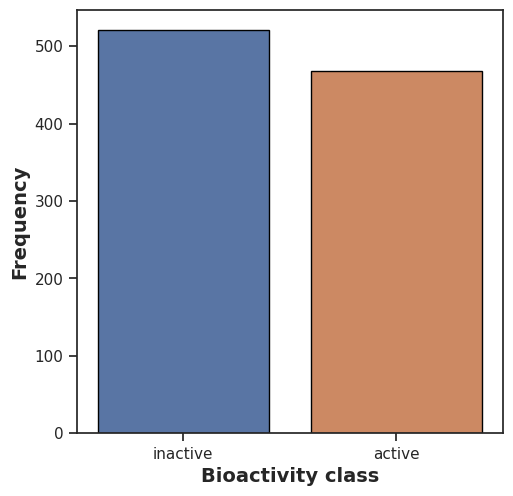

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

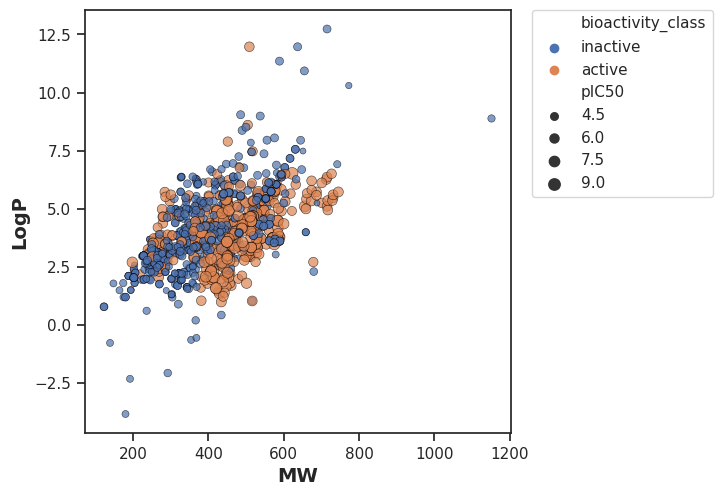

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

pIC50 value

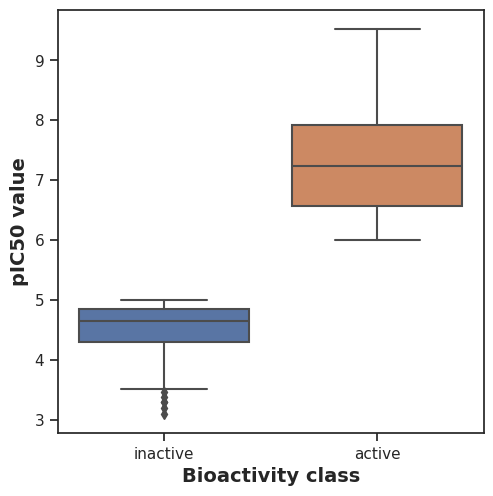

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [48]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [49]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,243828.0,9.756114e-163,0.05,Different distribution (reject H0)


MW

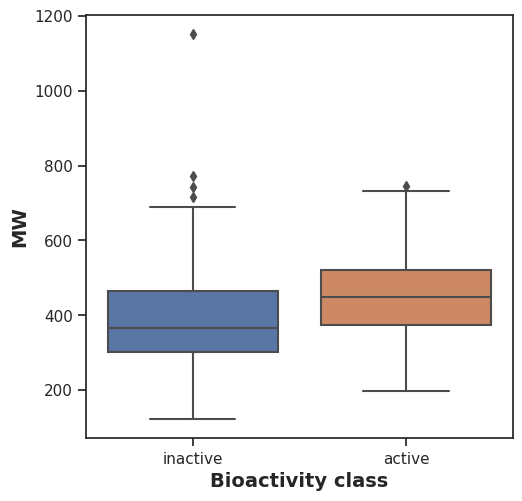

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [52]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,160375.5,9.870993e-18,0.05,Different distribution (reject H0)


LogP

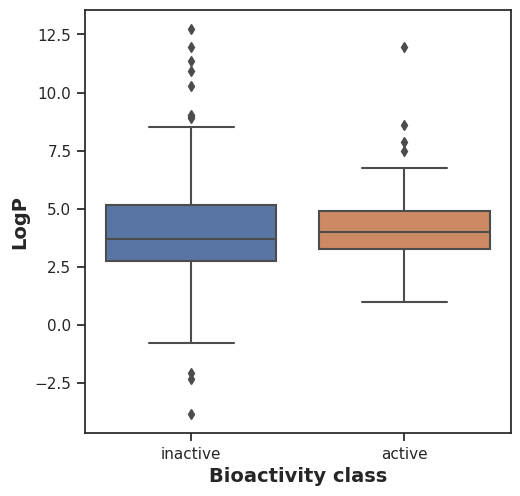

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [54]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,131261.5,0.037156,0.05,Different distribution (reject H0)


NumHDonors

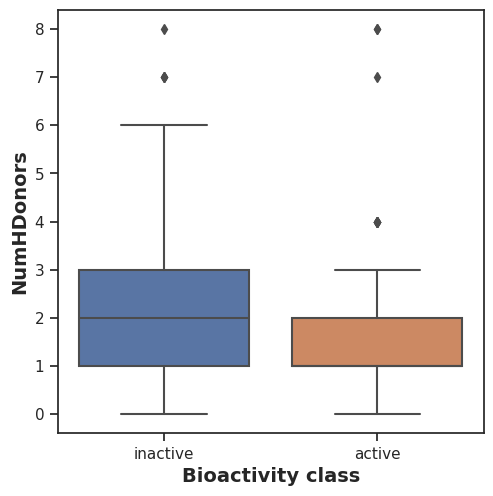

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [57]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,93084.5,2.514340e-11,0.05,Different distribution (reject H0)


NumHAcceptors

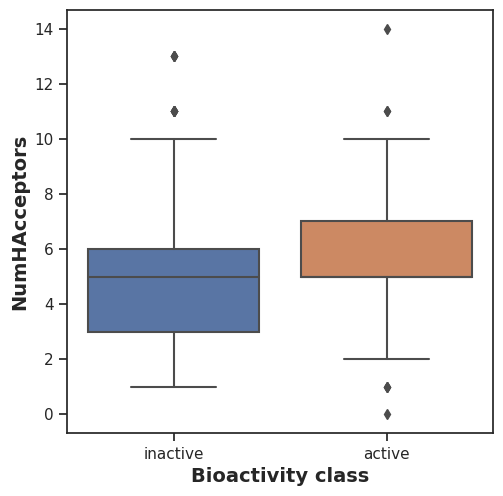

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [59]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,154268.0,2.505373e-13,0.05,Different distribution (reject H0)


In [60]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files 
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: pIC50_data.csv (deflated 79%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: pIC50_2class_data.csv (deflated 78%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)


In [61]:
!cp results.zip '/content/drive/MyDrive/Colab Notebooks/data_alzheimer'

In [62]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/data_alzheimer'

total 1771
-rw------- 1 root root 1054260 Jul 30 18:31 bioactivity_data.csv
-rw------- 1 root root  119141 Jul 30 18:35 bioactivity_preprocessed_data.csv
-rw------- 1 root root  139713 Jul 30 19:17 pIC50_2class_data.csv
-rw------- 1 root root  197682 Jul 30 19:14 pIC50_data.csv
-rw------- 1 root root  301239 Jul 30 19:25 results.zip
